# 주제: 머신러닝 프로젝트 : Airbnb (New York City) 가격 예측

## 1. 데이터 소개

- 미국 NYC Airbnb 목록(2019)
- 데이터 출처:https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data (License CC0: Public Domain)
- 프로젝트 목적: 가격 예측(price)
- 제공 데이터(3개): train.csv, test.csv, y_test(최종 채점용)
- 평가 방식: MSE

## 2. 진행 목표

- Baseline, 나만의 프로젝트 성능 향상 방법, 김태헌 강사님의 프로젝트 성능 향상 팁 세 가지로 나누어 비교한다. 

## 3. Baseline

### (1) 데이터 불러오기

In [44]:
# 라이브러리 
import pandas as pd

In [45]:
# 데이터 불러오기
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

### (2) EDA (탐색적 데이터 분석)

In [46]:
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [47]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [48]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [49]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [50]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<AxesSubplot:>

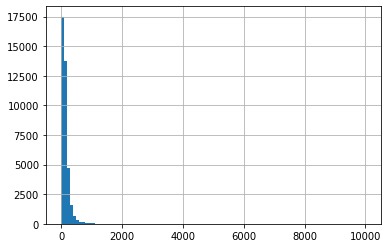

In [51]:
# target(hist)
train['price'].hist(bins=100)

In [52]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [53]:
# 피처(host_id)
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

### (3) 데이터 전처리

In [54]:
# 결측치 컬럼 삭제 (last_review)
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

In [55]:
# 결측치 채우기
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [56]:
# 결측치 확인
train.isnull().sum()

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [57]:
# 가격 값 복사
target = train['price']
train = train.drop('price', axis=1)

In [58]:
# 수치형 피처 선택
cols = [
        'host_id',
        'latitude', 
        'longitude', 
        'minimum_nights',
        'number_of_reviews', 
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
        ]

train = train[cols]
test = test[cols]

### (4) 검증데이터 분리하기

In [59]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2023)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 8), (7824, 8), (31292,), (7824,))

### (5) 모델 적용과 평가

In [60]:
# 선형 회귀
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

91548.00891680332

In [61]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# 선형 회귀
pred = model.predict(test)
mean_squared_error(y_test, pred)

52592.76225286647

In [62]:
# 릿지 회귀
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.04425e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


91556.84528827443

In [63]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# 릿지 회귀
pred = model.predict(test)
mean_squared_error(y_test, pred)

52594.17667203294

In [64]:
# 라쏘 회귀
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

92537.37739877818

In [65]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# 라쏘 회귀
pred = model.predict(test)
mean_squared_error(y_test, pred)

53224.66401171717

In [66]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

93421.31611074142

In [67]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# 엘라스틱넷 회귀
pred = model.predict(test)
mean_squared_error(y_test, pred)

53906.50136066141

In [68]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

89739.98056220602

In [69]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# 랜덤포레스트 
pred = model.predict(test)
mean_squared_error(y_test, pred)

49923.59772369363

In [70]:
# Xgboost
from xgboost import XGBRegressor
model = XGBRegressor(random_state=2022)

model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

83189.24196358326

In [71]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# Xgboost
pred = model.predict(test)
mean_squared_error(y_test, pred)

49262.279099458945

In [72]:
# baseline score(mse 51xxx) 보다 점수가 낮게 나오도록 프로젝트 도전


## 4.  나만의 프로젝트 성능 향상 방법

### (1) More Data(더 많은 데이터 추가)  
: 현시점에서 진행하기엔 시간이 부족하다. 하지만 Pytorch에서 Data Augmentation 모듈을 제공하니 다음에 활용해보는 것도 방법이다.(맨밑에 링크 참고)  
### (2) Nomalization (정규화)  
: Min-Max Scaler 방식으로 스케일 조정   
### (3) Model Selection (모델 선택)  
: SGD분류, SVM 모델도 적용해보기   
### (4) Hyperparameter Tuning (하이퍼파라미터 조정)  
: 라쏘회귀, 릿지회귀, 랜덤포레스트, Xgboost의 하이퍼파라미터 조정해보기 (선형회귀의 하이퍼파라미터는 비용함수 최적화영역까지 들어가야 가능하다)   
### (5) Longer/Better Optimzation (비용함수 최적화)  
: 비용함수 최적화는 좀더 복잡하기 때문에 다음 프로젝트에서 다뤄보도록 한다.

### 결론: 정규화 진행 후, 8가지 모델 성능 평가(+ 하이퍼파라미터 조정)

### a. 정규화

In [73]:
from sklearn.preprocessing import StandardScaler

copy_train = train
copy_test = test
scaler = StandardScaler()
scaler.fit(copy_train)
scaler.fit(copy_test)
scaler_train = scaler.transform(copy_train)
scaler_test = scaler.transform(copy_test)

### b. 검증 데이터 분리

In [74]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(scaler_train, target, test_size=0.2, random_state=2023)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 8), (7824, 8), (31292,), (7824,))

### c. 모델 적용, 하이퍼파라미터 조정, 평가 

#### c-1 선형 회귀 (하이퍼파라미터 조정 X)

In [75]:
# 선형 회귀
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

91548.00891680316

In [76]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# 선형 회귀
pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


6.5112329728167416e+16

#### c-2 릿지 회귀 (Alpha값 조정)

In [95]:
# 릿지 회귀
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

91548.04501483738

In [96]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# 릿지 회귀
pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


6.5113220914984424e+16

In [97]:
#alpha = 100
model = Ridge(alpha = 100) 
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

91551.6271747011

In [98]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# 릿지 회귀
pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


6.5195648629050104e+16

In [99]:
#alpha = 50
model = Ridge(alpha = 50) #6.5195648629050104e+16, 6.515544448728329e+16 6.512118825493694e+16
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

91549.81592601344

In [100]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# 릿지 회귀
pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


6.515544448728329e+16

In [101]:
#alpha = 10
model = Ridge(alpha = 10) #6.5195648629050104e+16, 6.515544448728329e+16 6.512118825493694e+16
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

91548.3699750145

In [102]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# 릿지 회귀
pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


6.512118825493694e+16

-> 릿지회귀의 alpha값을 100, 50, 10으로 조정해 본 결과, MSE값이 alpha가 100일때, 50일때, 10일때, 조정을 안 할때 순으로 6.519, 6.515, 6.512, 6.511인 것을 알 수 있으며 조정하지 않은 값이 가장 최적의 값이 나오는 것을 알 수 있다. 

#### c-3 라쏘 회귀 (Alpha값 조정)

In [103]:
# 라쏘 회귀
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

91593.37547242157

In [104]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# 라쏘 회귀
pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


2.3453492299090096e+16

In [105]:
# alpha = 100
from sklearn.linear_model import Lasso

model = Lasso(alpha = 100)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

94510.7380431234

In [106]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# 라쏘 회귀
pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


54594.588568061816

In [107]:
# alpha = 50
from sklearn.linear_model import Lasso

model = Lasso(alpha = 50)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

94510.7380431234

In [108]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# 라쏘 회귀
pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


54594.588568061816

In [109]:
# alpha = 10
from sklearn.linear_model import Lasso

model = Lasso(alpha = 10)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

92468.32022163959

In [110]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# 라쏘 회귀
pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


11923136.021075487

-> 라쏘회귀의 alpha값을 100, 50, 10으로 조정해 본 결과, MSE값이 alpha가 100일때, 50일때, 10일때, 조정을 안 할때 순으로 54594.588, 54594.588, 11923136.021, 2.345인 것을 알 수 있으며 조정하지 않은 값이 가장 최적의 값이 나오는 것을 알 수 있다. 

#### c-4 엘라스틱넷 회귀 (Alpha값 조정)

In [111]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

92154.52914535384

In [112]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# 엘라스틱넷 회귀
pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


3.080011212307676e+16

In [119]:
# alpha = 0.9
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha = 0.9)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

92099.44539107374

In [120]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# 엘라스틱넷 회귀
pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


3.358815913383879e+16

In [115]:
# alpha = 0.5
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha = 0.5)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

91861.96692983445

In [116]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# 엘라스틱넷 회귀
pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


4.7300569024503464e+16

In [117]:
# alpha = 0.1
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha = 0.1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

91608.44458064293

In [118]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# 엘라스틱넷 회귀
pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


6.286533685879729e+16

-> 엘라스틱넷 회귀의 alpha값을 0.9, 0.5, 0.1으로 조정해 본 결과, MSE값이 alpha가 0.9일때, 0.5일때, 0.1일때, 조정을 안 할때 순으로 3.358, 4.730, 6.286, 3.080인 것을 알 수 있으며 조정하지 않은 값일때 가장 최적의 값이 나오는 것을 알 수 있다. 

#### c-5 랜덤포레스트 (GridSearchCV를 통한 튜닝)

In [122]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

89757.62563041922

In [123]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# 랜덤포레스트
pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


1266735.561021904

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 42, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


KeyboardInterrupt: 

In [128]:
#위의 결과로 나온 최적 하이퍼 파라미터로 다시 모델을 학습하여 
#테스트 세트 데이터에서 예측 성능을 측정
rf_clf1 = RandomForestClassifier(n_estimators = 100, 
                                max_depth = 12,
                                min_samples_leaf = 8,
                                min_samples_split = 8,
                                random_state = 42,
                                n_jobs = -1)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


63856.732692504345

-> 블로그를 참고하여 GridSearchCV를 통한 튜닝을 하려고 하였으나 알 수 없는 오류가 떠서 튜닝에 실패하였다. 하지만 정규화 이후, mse값이 1266735.561가 나오면서 앞의 모델들과 다르게 크게 성능이 더 떨어진 것을 알 수 있다. 

#### c-6 XGBoost

In [130]:
# Xgboost
from xgboost import XGBRegressor
model = XGBRegressor(random_state=2022)

model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

83216.13547958717

In [131]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# Xgboost
pred = model.predict(test)
mean_squared_error(y_test, pred)

2293792.4683844387

-> 랜덤포레스트와 마찬가지로 2293792.468 값으로 성능이 안 좋은 것을 알 수 있다. 

#### c-7 svm

In [134]:
from sklearn import svm 
model = svm.SVC() 

model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

93230.37282719837

In [135]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# svm
pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


57359.73780550159

랜덤포레스트와 마찬가지로 57359.737 값으로 성능이 안 좋은 것을 알 수 있다.

#### c-8 SGD분류

In [ ]:
#SGD분류기 임포트하기
from sklearn.linear_model import SGDClassifier 
model = SGDClassifier() 

model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

In [ ]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# sgd
pred = model.predict(test)
mean_squared_error(y_test, pred)

-> 시간이 오래 걸리도록 실행이 되지 않음.

## 5. 강사님의 팁

In [141]:
# 라이브러리 
import pandas as pd

# 데이터 불러오기
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [142]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


<AxesSubplot:>

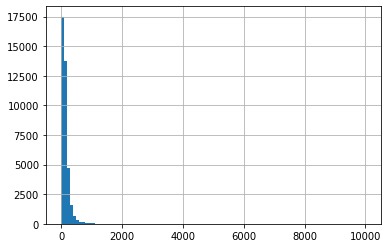

In [143]:
# target(hist)
train['price'].hist(bins=100)

In [144]:
import numpy as np
print(train['price'][:3])
print(np.log1p(train['price'])[:3])
print(np.expm1(np.log1p(train['price'])[:3]))

0     70
1    240
2    150
Name: price, dtype: int64
0    4.262680
1    5.484797
2    5.017280
Name: price, dtype: float64
0     70.0
1    240.0
2    150.0
Name: price, dtype: float64


<AxesSubplot:>

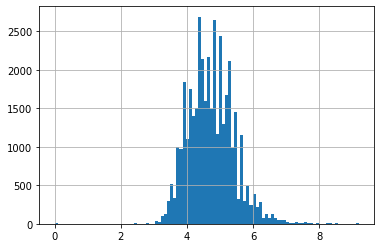

In [145]:
train['price'] = np.log1p(train['price'])
train['price'].hist(bins=100)

In [146]:
# 결측치 컬럼 삭제 (last_review)
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

In [147]:
# 결측치 채우기
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [148]:
# 결측치 확인
train.isnull().sum()

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [149]:
# 가격 값 복사
target = train['price']
train = train.drop('price', axis=1)

In [150]:
# 수치형 피처 선택
# 수치형 데이터와 범주형 데이터 분리 
n_train = train.select_dtypes(exclude='object').copy()
c_train = train.select_dtypes(include='object').copy()
n_test = test.select_dtypes(exclude='object').copy()
c_test = test.select_dtypes(include='object').copy()


In [151]:
n_train.describe()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.911600e+04,3.911600e+04,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000
mean,1.898464e+07,6.774143e+07,40.728848,-73.952125,6.990720,23.272855,1.091963,7.090756,112.980826
std,1.099302e+07,7.881383e+07,0.054499,0.046354,20.310323,44.589170,1.600772,32.661136,131.674306
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.412608e+06,7.834978e+06,40.690038,-73.983190,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.963650e+07,3.070949e+07,40.723000,-73.955740,2.000000,5.000000,0.370000,1.000000,45.000000
75%,2.913445e+07,1.074344e+08,40.762943,-73.936338,5.000000,23.000000,1.590000,2.000000,228.000000
max,3.648561e+07,2.743213e+08,40.912340,-73.712990,1250.000000,629.000000,58.500000,327.000000,365.000000


In [152]:
n_train = n_train.drop('id', axis=1)
n_test = n_test.drop('id', axis=1)

In [153]:
c_train.head(1)

,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Room in South Harlem near Central Park,Gilles,Manhattan,Harlem,Private room


In [154]:
c_train.describe()

,name,host_name,neighbourhood_group,neighbourhood,room_type
count,39104,39099,39116,39116,39116
unique,38420,9977,5,221,3
top,Home away from home,Michael,Manhattan,Williamsburg,Entire home/apt
freq,15,338,17331,3099,20299


In [155]:
# 범주형 변수
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = [
        'neighbourhood_group',
        'neighbourhood',
        'room_type'
        ]

display(c_train.head(1))

,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Room in South Harlem near Central Park,Gilles,Manhattan,Harlem,Private room


In [156]:
for col in cols:
    c_train[col] = le.fit_transform(c_train[col])
    c_test[col] = le.transform(c_test[col])

display(c_train.head(1))

,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Room in South Harlem near Central Park,Gilles,2,94,1


In [157]:
del_cols =['name','host_name']
c_train = c_train.drop(del_cols, axis=1)
c_test = c_test.drop(del_cols, axis=1)

In [158]:
# 분리한 데이터 다시 합침
train = pd.concat([n_train, c_train], axis=1)
test = pd.concat([n_test, c_test], axis=1)
print(train.shape, test.shape)
train.head()

(39116, 11) (9779, 11)


,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,94219511,40.80167,-73.95781,3,3,0.09,2,0,2,94,1
1,49015331,40.76037,-73.99016,2,64,1.68,2,262,2,95,0
2,440022,40.73001,-74.00562,60,1,0.20,1,0,2,209,0
3,3577509,40.69128,-73.93653,4,239,2.89,2,1,1,13,0
4,12475280,40.68899,-73.95555,28,0,0.00,1,0,1,13,1


In [159]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 11), (7824, 11), (31292,), (7824,))

In [160]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=2022, n_estimators=200)
model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

23270.981080880356

In [161]:
# Xgboost
from xgboost import XGBRegressor
model = XGBRegressor(max_depth=10,
                     learning_rate=0.02,
                     n_estimators=500,
                     random_state=2022)

model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

22284.40342472512

In [163]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('y_test.csv')

# Xgboost
pred = model.predict(test)

pred = np.expm1(pred)
mean_squared_error(y_test, pred)

FileNotFoundError: [Errno 2] No such file or directory: 'y_test.csv'

-> 42778.285값으로 Baseline에 비해 나아진 것을 알 수 있다. 

## 6. 결론

정규화를 적용하였을때, 선형회귀, 라쏘회귀, 릿지회귀, 엘라스틱넷회귀 모델에서는 크게 mse가 크게 줄어드는 모습을 확인 할 수 있는 반면에 랜덤포레스트, XGBoost, svm, SGD분류 모델에서는 오히려 크게 더 증가하는 모습을 확인 할 수 있다. 이를 통해 모든 모델이 정규화를 한다고 모델의 성능을 최적화한다고 할 수 없다. 또한 반대로, 전자의 모델이 오히려 과적합되어서 mse값이 작은 것일 가능성도 있다. 따라서 상황에 맞게 정규화를 진행해야 하며 이를 분석할 수 있는 능력을 키워야겠다. 

# 프로젝트 회고

## 1. 배운점
(1) 머신러닝 성능 향상 방법  
머신러닝 성능 향상 방법이 여러 가지가 있으며 모든 방법이 적절한 것은 아니고 데이터에 따라, 모델에 따라 적합한 방법을 잘 선택해야 한다는 점을 배웠다. 또한 선형회귀의 경우, 정규화를 진행했을 때 특히 mse가 크게 줄어드는 것을 알 수 있었다. 

(2) 코드
1. display(): 한 번에 여러 데이터프레임을 출력할 수 있는 함수  
2. .fillna(0): 0으로 빈칸을 채우는 함수  
3. StandardScaler, GridSearchCV 등의 다양한 라이브러리

## 2. 아쉬운점
1. 랜덤포레스트, XGBoost, svm, SGD분류 모델 코드를 돌렸을 때 잘 실행되지 않는 현상을 발견하였고 그 이유를 아직 알지 못하였다. 
2. 다른 사람의 코드를 보니 랜덤포레스트, XGBoost의 하이퍼파라미터를 조정할 때 RandomizedSearchCV를 사용한 것을 보며 다음엔 이것을 적용해보아야겠다. 
3. 시간이 부족해서 마지막 SGD분류 모델의 코드를 다 돌리지 못하였는데 시간이 아무리 지나도 실행되지 않는 것을 보아 연산작업이 많이 필요한 것이거나 어떤 문제가 있을 것으로 예상된다. 


## 3. 종합의견
여러가지 모델에 대해서 여러 하이퍼파라미터 변경을 실험해 볼 수 있는 좋은 기회였다. 가가 모델에 대한 과학적, 수학적 지식도 공부하여 더욱 자세히 알아보아야겠다. 또한 급하게 프로젝트를 완성하느라 마지막에 시간을 들이지 못한 점이 아쉽다. 다음엔 더 빨리 준비해야겠다. 

# Reference
1. 파이토치 시각데이터 증가 모듈  
https://pytorch.org/vision/main/transforms.html  
2. 딥러닝 모델 성능 향상 팁  
https://facerain.club/improve-dl-performance/  
3. Normalization, Standardization, Ragularization의 차이와 정규화 과정  
https://jeongwooyeol0106.tistory.com/26  
4. 정규화 코드   
https://muzukphysics.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%B5%9C%EB%8C%80-%EC%B5%9C%EC%86%8C-%EC%A0%95%EA%B7%9C%ED%99%94-%EC%98%88%EC%A0%9C-Python-Data-MinMaxScaler-with-sklearn  
5. 라쏘회귀, 릿지회귀, 엘라스틱넷회귀  
https://analysis-flood.tistory.com/87  
6. GridSearchCV를 통한 튜닝  
https://injo.tistory.com/30  
7. 현업자의 XGBoost 조정  
https://dining-developer.tistory.com/4  